In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt

Mounting the google drive



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/Colab\ Notebooks/train.csv

'/content/drive/MyDrive/Colab Notebooks/train.csv'


In [4]:
!ls /content/drive/MyDrive/Colab\ Notebooks/test.csv

'/content/drive/MyDrive/Colab Notebooks/test.csv'


## DATA COLLECTION


In [5]:
train_df =pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/train.csv')

In [6]:
test_df= pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/test.csv')

In [7]:
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [8]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


In [9]:
train_df.shape

(188533, 13)

In [10]:
test_df.shape

(125690, 12)

In [11]:
print('train_df_info:'.format(train_df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB
train_df_info:


In [12]:
print('test_df_info:'.format(test_df.info()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125690 entries, 0 to 125689
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            125690 non-null  int64 
 1   brand         125690 non-null  object
 2   model         125690 non-null  object
 3   model_year    125690 non-null  int64 
 4   milage        125690 non-null  int64 
 5   fuel_type     122307 non-null  object
 6   engine        125690 non-null  object
 7   transmission  125690 non-null  object
 8   ext_col       125690 non-null  object
 9   int_col       125690 non-null  object
 10  accident      124058 non-null  object
 11  clean_title   111451 non-null  object
dtypes: int64(3), object(9)
memory usage: 11.5+ MB
test_df_info:


In [13]:
test_df.describe()

,id,model_year,milage
count,125690.000000,125690.000000,125690.000000
mean,251377.500000,2015.797526,66042.581510
std,36283.722005,5.673797,50223.858435
min,188533.000000,1974.000000,100.000000
25%,219955.250000,2013.000000,24500.000000
50%,251377.500000,2017.000000,57500.000000
75%,282799.750000,2020.000000,95798.000000
max,314222.000000,2024.000000,405000.000000


In [14]:
train_df.describe()

,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


### Exploratory data analysis of how each numeric features relates to the target  variables


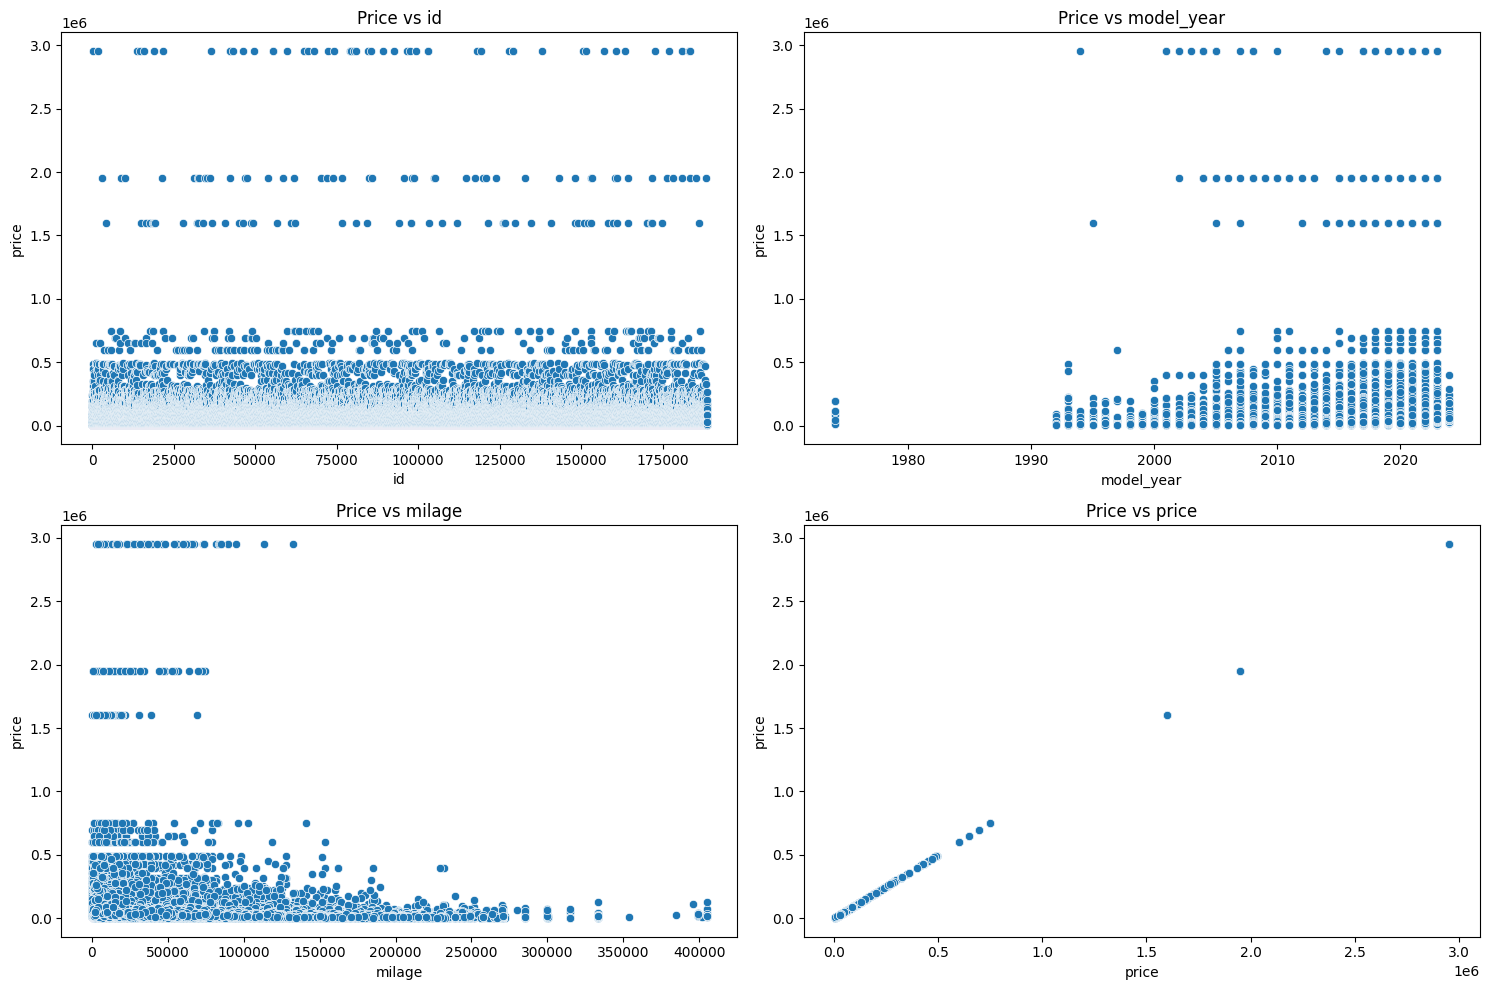

In [15]:
#Exploratory data Analysis of how each numeric features relates to the target variables
import matplotlib.pyplot as plt
import seaborn as sns
numerical_cols = train_df.select_dtypes(exclude='object').columns
categorical_cols = train_df.select_dtypes(include='object').columns

def plots(columns, ncols_for_subplot, df):
    ncols = ncols_for_subplot
    nrows = -(-len(columns) // ncols)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(columns):
        sns.scatterplot(x=col, y='price', data=df, ax=axes[i])
        axes[i].set_title(f'Price vs {col}')

    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plots(numerical_cols[:4], 2, train_df)  # Example with first 4 numerical features


## DATA PREPROCESSING : Checking missing values





In [16]:
train_df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,5083
engine,0
transmission,0
ext_col,0
int_col,0


In [17]:
test_df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,3383
engine,0
transmission,0
ext_col,0
int_col,0


In [18]:
print('For training data:')
for i in ['fuel_type','accident','clean_title']:
  print(f'{i}:{train_df[i].unique()}')

print('for testing data:')
for i in ['fuel_type','accident','clean_title']:
  print(f"{i}:{test_df[i].unique()}")

For training data:
fuel_type:['Gasoline' 'E85 Flex Fuel' nan 'Hybrid' 'Diesel' 'Plug-In Hybrid' '–'
 'not supported']
accident:['None reported' 'At least 1 accident or damage reported' nan]
clean_title:['Yes' nan]
for testing data:
fuel_type:['Gasoline' 'Hybrid' 'Diesel' 'E85 Flex Fuel' nan 'Plug-In Hybrid' '–'
 'not supported']
accident:['None reported' 'At least 1 accident or damage reported' nan]
clean_title:['Yes' nan]


### Imputting missing values for the fuel_type


In [19]:
#imputing fuel_type
train_df['fuel_type'].fillna('light',inplace=True)
test_df['fuel_type'].fillna('light',inplace=True)

/tmp/ipython-input-3209245566.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['fuel_type'].fillna('light',inplace=True)
/tmp/ipython-input-3209245566.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

## Visualizing a bar chart for the Fuel_type


/tmp/ipython-input-1294416357.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


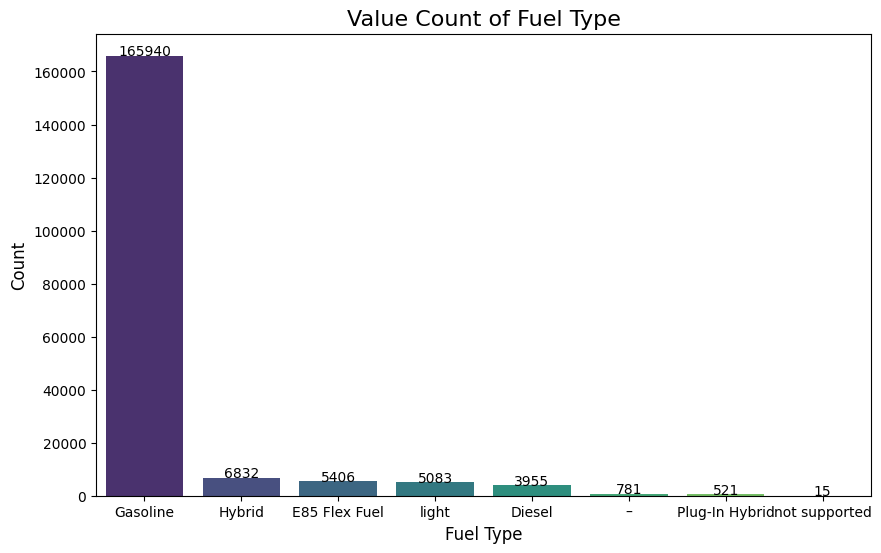

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create vertical bar chart
sns.barplot(
    x=train_df['fuel_type'].value_counts().index,    # categories on X-axis
    y=train_df['fuel_type'].value_counts().values,   # counts on Y-axis
    palette="viridis"
)

# Add labels for each bar
for index, value in enumerate(train_df['fuel_type'].value_counts().values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Titles and labels
plt.title('Value Count of Fuel Type', fontsize=16)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


### Imputting missing values for clean_title

In [21]:
#imputing clean_title
train_df['clean_title'].fillna('No',inplace=True)
test_df['clean_title'].fillna('No',inplace=True)

/tmp/ipython-input-1925912558.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['clean_title'].fillna('No',inplace=True)
/tmp/ipython-input-1925912558.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

### Visualizing a barchart showing the value_counts of clean_title


/tmp/ipython-input-3958425489.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


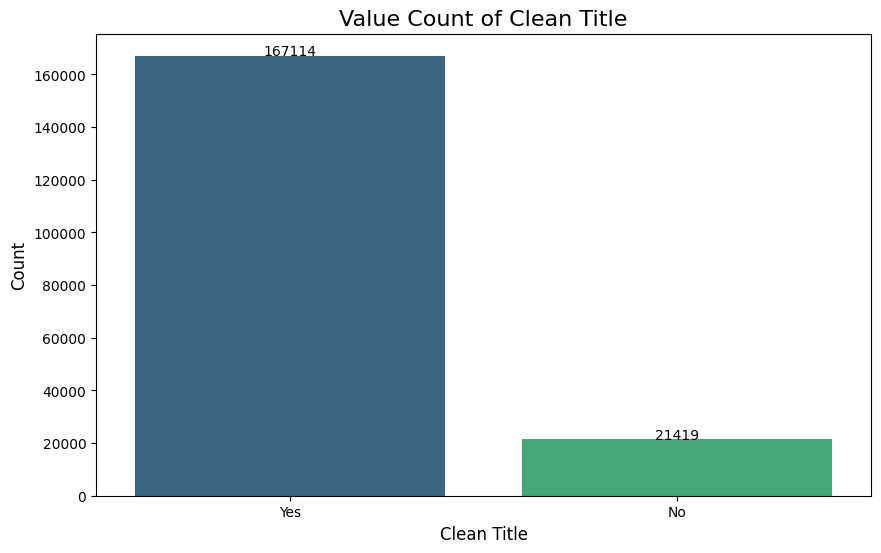

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create vertical bar chart
sns.barplot(
    x=train_df['clean_title'].value_counts().index,   # categories on X-axis
    y=train_df['clean_title'].value_counts().values,  # counts on Y-axis
    palette="viridis"
)

# Add labels for each bar
for index, value in enumerate(train_df['clean_title'].value_counts().values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Titles and labels
plt.title('Value Count of Clean Title', fontsize=16)
plt.xlabel('Clean Title', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


### Imputting missing values for accident

In [23]:
train_df['accident'].fillna('None reported',inplace=True)
test_df['accident'].fillna('None reported',inplace=True)

/tmp/ipython-input-853572768.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['accident'].fillna('None reported',inplace=True)
/tmp/ipython-input-853572768.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

### Visualizing barchart for the value_counts of accident

/tmp/ipython-input-10257006.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


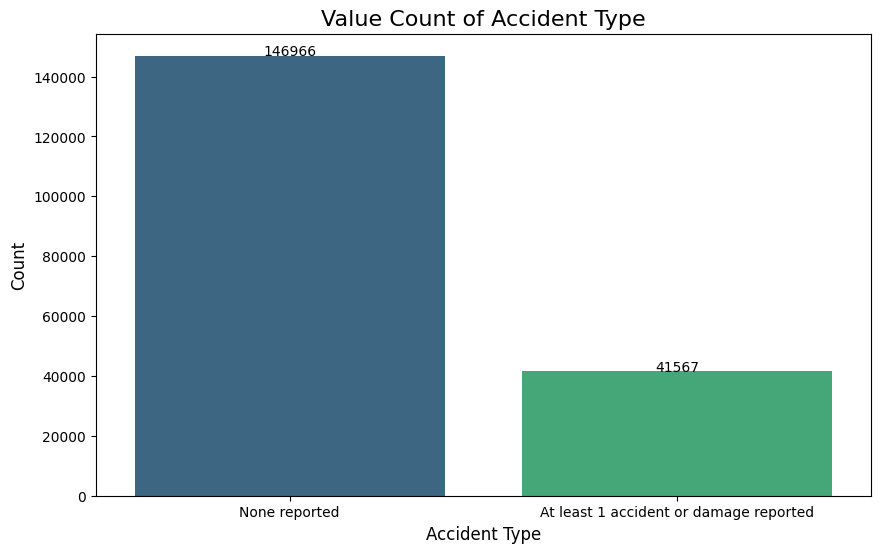

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

# Create vertical bar chart
sns.barplot(
    x=train_df['accident'].value_counts().index,    # categories on X-axis
    y=train_df['accident'].value_counts().values,   # counts on Y-axis
    palette="viridis"
)

# Add labels on top of bars
for index, value in enumerate(train_df['accident'].value_counts().values):
    plt.text(index, value + 0.5, str(value), ha='center', fontsize=10)

# Titles and labels
plt.title('Value Count of Accident Type', fontsize=16)
plt.xlabel('Accident Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

plt.show()


In [25]:
train_df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


In [26]:
test_df.isnull().sum()

,0
id,0
brand,0
model,0
model_year,0
milage,0
fuel_type,0
engine,0
transmission,0
ext_col,0
int_col,0


### Extracting Features
#### Observation- enigne feature contains clubbed information, extracting new features from it

In [27]:
#Extracting the features of engine
def extract_engine_features(df):
    # Use regex to extract HP, engine size (L or liter), and cylinders
    df['Horsepower'] = df['engine'].str.extract(r'(\d+\.\d*|\d+)HP', expand=False).astype(float)

    # Match engine size represented as either 'L' or 'liter' or 'Liter'
    df['Liters_engine'] = df['engine'].str.extract(r'(\d+\.\d*|\d+)\s*(?:L|liter|Liter)', expand=False).astype(float)

    df['Cylinders_count'] = df['engine'].str.extract(r'(\d+)\s+Cylinder', expand=False).astype(float)
    return df

train_df=extract_engine_features(train_df)
test_df=extract_engine_features(test_df)

In [28]:
train_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Liters_engine,Cylinders_count
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8.0
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0


In [29]:
test_df.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,Horsepower,Liters_engine,Cylinders_count
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes,240.0,2.0,4.0
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes,395.0,3.0,6.0
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,No,NaN,3.5,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,No,NaN,2.0,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes,252.0,2.0,4.0


In [30]:
#let's drop engine
train_df.drop('engine',axis=1,inplace=True)
test_df.drop('engine',axis=1,inplace=True)

### Applying Feature Engineering to get the Car age

In [31]:
# deriving car's age from model_year
from datetime import datetime
def model_age(df):
    current_year=datetime.now().year
    df['model_age']=current_year-df['model_year']
    return df

train_df=model_age(train_df)
test_df=model_age(test_df)

In [32]:
train_df.drop('model_year',axis=1,inplace=True)

In [33]:
test_df.drop('model_year',axis=1,inplace=True)

In [34]:
train_df.isnull().sum()

,0
id,0
brand,0
model,0
milage,0
fuel_type,0
transmission,0
ext_col,0
int_col,0
accident,0
clean_title,0


In [35]:
test_df.isnull().sum()

,0
id,0
brand,0
model,0
milage,0
fuel_type,0
transmission,0
ext_col,0
int_col,0
accident,0
clean_title,0


In [36]:
print('For training data:')
for i in ['Horsepower','Liters_engine','Cylinders_count']:
  print(f'{i}:{train_df[i].unique()}')

print('for testing data:')
for i in ['Horsepower','Liters_engine','Cylinders_count']:
  print(f"{i}:{test_df[i].unique()}")

For training data:
Horsepower:[ 172.  252.  320.  420.  208.  333.  355.   nan  425.  312.  523.  503.
  395.  310.  469.  429.  210.  335.  316.  381.  450.  236.  211.  220.
  255.  518.  268.  174.  240.  248.  563.  241.  230.  430.  835.  300.
  280.  295.  348.  560.  285.  302.  490.  200.  416.  179.  385.  160.
  270.  350.  190.  181.  265.  345.  400.  261.  536.  402.  382.  180.
  617.  173.  389.  318.  325.  365.  340.  235.  169.  710.  225.  366.
  284.  260.  670.  480.  440.  301.  380.  616.  317.  435.  305.  471.
  443.  328.  550.  201.  276.  582.  290.  362.  184.  120.  275.  510.
  414.  375.  455.  520.  306.  292.  403.  454.  496.  166.  288.  640.
  293.  147.  263.  170.  577.  449.  296.  291.  467.  354.  283.  603.
  386.  264.  204.  215.  412.  150.  453.  140.  707.  242.  445.  410.
  500.  188.  557.  142.  199.  315.  282.  247.  182.  605.  161.  475.
  202.  349.  152.  228.  154.  383.  526.  760.  630.  212.  287.  717.
  521.  232.  444.  6

### Using imputers for handling missing values (for newly extracted features)

In [37]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer, SimpleImputer

imputer=IterativeImputer(max_iter=10, tol=1e-3, random_state=0)
train_df[['Horsepower', 'Liters_engine']] = imputer.fit_transform(train_df[['Horsepower', 'Liters_engine']])
test_df[['Horsepower', 'Liters_engine']] = imputer.transform(test_df[['Horsepower', 'Liters_engine']])

# Simple Imputter because it i not a complex model
simple_imputer = SimpleImputer(strategy='mean')
train_df['Cylinders_count'] = simple_imputer.fit_transform(train_df[['Cylinders_count']])
test_df['Cylinders_count'] = simple_imputer.transform(test_df[['Cylinders_count']])

In [38]:
train_df.isnull().sum()

,0
id,0
brand,0
model,0
milage,0
fuel_type,0
transmission,0
ext_col,0
int_col,0
accident,0
clean_title,0


In [39]:
test_df.isnull().sum()

,0
id,0
brand,0
model,0
milage,0
fuel_type,0
transmission,0
ext_col,0
int_col,0
accident,0
clean_title,0


### Performing more Feature Engineering to improve the model


In [40]:
#Derived engine ratios that is horsepower per litre
train_df['hp_per_liter'] = train_df['Horsepower']/ (train_df['Liters_engine'] + 1e-5)
test_df['hp_per_liter'] = test_df['Horsepower']/ (test_df['Liters_engine'] +1e-5)

In [41]:
for df in [train_df,test_df]:
  df['log_milage'] = np.log1p(df['milage'])
  df['milage_per_year'] =df['milage'] / (df['model_age'])

In [42]:
#performing feature engineering by multiplying model_age by milage
def model_age_milage (df):
  df['age_x_milage'] = df['model_age'] * df['milage']
  return df
train_df = model_age_milage(train_df)



In [43]:
def model_age_milage(df):
  df['age_x_milage'] = df ['model_age'] * df['milage']
  return df
test_df = model_age_milage(test_df)

In [44]:
for df in [train_df,test_df]:
  df['hp_per_model_age'] = df['Horsepower'] / (df['model_age'])

In [45]:
train_df.head()

,id,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,price,Horsepower,Liters_engine,Cylinders_count,model_age,hp_per_liter,log_milage,milage_per_year,age_x_milage,hp_per_model_age
0,0,MINI,Cooper S Base,213000,Gasoline,A/T,Yellow,Gray,None reported,Yes,4200,172.0,1.6,4.0,18,107.499328,12.269052,11833.333333,3834000,9.555556
1,1,Lincoln,LS V8,143250,Gasoline,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999,252.0,3.9,8.0,23,64.615219,11.872354,6228.260870,3294750,10.956522
2,2,Chevrolet,Silverado 2500 LT,136731,E85 Flex Fuel,A/T,Blue,Gray,None reported,Yes,13900,320.0,5.3,8.0,23,60.377245,11.825778,5944.826087,3144813,13.913043
3,3,Genesis,G90 5.0 Ultimate,19500,Gasoline,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000,420.0,5.0,8.0,8,83.999832,9.878221,2437.500000,156000,52.500000
4,4,Mercedes-Benz,Metris Base,7388,Gasoline,7-Speed A/T,Black,Beige,None reported,Yes,97500,208.0,2.0,4.0,4,103.999480,8.907748,1847.000000,29552,52.000000


In [46]:
test_df.head()

,id,brand,model,milage,fuel_type,transmission,ext_col,int_col,accident,clean_title,Horsepower,Liters_engine,Cylinders_count,model_age,hp_per_liter,log_milage,milage_per_year,age_x_milage,hp_per_model_age
0,188533,Land,Rover LR2 Base,98000,Gasoline,6-Speed A/T,White,Beige,None reported,Yes,240.000000,2.0,4.000000,10,119.999400,11.492733,9800.000000,980000,24.000000
1,188534,Land,Rover Defender SE,9142,Hybrid,8-Speed A/T,Silver,Black,None reported,Yes,395.000000,3.0,6.000000,5,131.666228,9.120744,1828.400000,45710,79.000000
2,188535,Ford,Expedition Limited,28121,Gasoline,10-Speed Automatic,White,Ebony,None reported,No,324.098554,3.5,6.374268,3,92.599322,10.244307,9373.666667,84363,108.032851
3,188536,Audi,A6 2.0T Sport,61258,Gasoline,Automatic,Silician Yellow,Black,None reported,No,244.550292,2.0,6.374268,9,122.274534,11.022866,6806.444444,551322,27.172255
4,188537,Audi,A6 2.0T Premium Plus,59000,Gasoline,A/T,Gray,Black,None reported,Yes,252.000000,2.0,4.000000,7,125.999370,10.985310,8428.571429,413000,36.000000


In [47]:
for col in train_df.select_dtypes(include=['object']).columns:
    print(f"{col}: {train_df[col].nunique()} unique values")


brand: 57 unique values
model: 1897 unique values
fuel_type: 8 unique values
transmission: 52 unique values
ext_col: 319 unique values
int_col: 156 unique values
accident: 2 unique values
clean_title: 2 unique values


In [48]:
for col in test_df.select_dtypes(include=['object']).columns:
  print(f"{col}:{test_df[col].nunique() }unique values")

brand:55unique values
model:1891unique values
fuel_type:8unique values
transmission:52unique values
ext_col:317unique values
int_col:156unique values
accident:2unique values
clean_title:2unique values


In [49]:
!pip install category_encoders


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.9/232.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 91.7 MB/s eta 0:00:00


### Categorical Encoding
### One-Hot Encoding for low-cardinality variables (fuel_type, transmission).

### Target Encoding for high-cardinality variables .

In [50]:
import category_encoders as  ce
#Define groups
low_cardinality_cols =['fuel_type','accident','clean_title']
high_cardinality_cols = ['brand','model','transmission','ext_col','int_col']

#using One_Hot Encoding
train_df = pd.get_dummies(train_df,columns=low_cardinality_cols,drop_first=True)
test_df = pd.get_dummies(test_df,columns=low_cardinality_cols,drop_first=True)

#Align columns so train and test match

test_df = test_df.reindex(columns=train_df.columns.drop('price'),fill_value=0)

encoder = ce.TargetEncoder(cols=high_cardinality_cols)
train_df[high_cardinality_cols] = encoder.fit_transform(train_df[high_cardinality_cols], train_df['price'])
test_df[high_cardinality_cols] = encoder.transform(test_df[high_cardinality_cols])



In [51]:
test_df.head()

,id,brand,model,milage,transmission,ext_col,int_col,Horsepower,Liters_engine,Cylinders_count,...,hp_per_model_age,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_light,fuel_type_not supported,fuel_type_–,accident_None reported,clean_title_Yes
0,188533,53204.880000,20734.621760,98000,25864.659998,40803.542622,29953.997428,240.000000,2.0,4.000000,...,24.000000,False,True,False,False,False,False,False,True,True
1,188534,53204.880000,74242.181923,9142,56442.748656,31878.405296,45524.117958,395.000000,3.0,6.000000,...,79.000000,False,False,True,False,False,False,False,True,True
2,188535,40511.969508,50420.818345,28121,63990.058786,40803.542622,49470.199127,324.098554,3.5,6.374268,...,108.032851,False,True,False,False,False,False,False,True,False
3,188536,41004.856985,28015.001169,61258,59588.575344,62387.487918,45524.117958,244.550292,2.0,6.374268,...,27.172255,False,True,False,False,False,False,False,True,False
4,188537,41004.856985,24723.991498,59000,31711.979140,47908.967106,45524.117958,252.000000,2.0,4.000000,...,36.000000,False,True,False,False,False,False,False,True,True


In [52]:
#Encode categorical varaibles of the train data
#from sklearn.preprocessing import LabelEncoder
#categorical_cols = train_df.select_dtypes(include=['object']).columns

#for col in categorical_cols:
  #le = LabelEncoder()
  #train_df[col] = le.fit_transform(train_df[col])

In [53]:
train_df.columns

Index(['id', 'brand', 'model', 'milage', 'transmission', 'ext_col', 'int_col',
       'price', 'Horsepower', 'Liters_engine', 'Cylinders_count', 'model_age',
       'hp_per_liter', 'log_milage', 'milage_per_year', 'age_x_milage',
       'hp_per_model_age', 'fuel_type_E85 Flex Fuel', 'fuel_type_Gasoline',
       'fuel_type_Hybrid', 'fuel_type_Plug-In Hybrid', 'fuel_type_light',
       'fuel_type_not supported', 'fuel_type_–', 'accident_None reported',
       'clean_title_Yes'],
      dtype='object')

In [54]:
train_df.head()

,id,brand,model,milage,transmission,ext_col,int_col,price,Horsepower,Liters_engine,...,hp_per_model_age,fuel_type_E85 Flex Fuel,fuel_type_Gasoline,fuel_type_Hybrid,fuel_type_Plug-In Hybrid,fuel_type_light,fuel_type_not supported,fuel_type_–,accident_None reported,clean_title_Yes
0,0,17162.015977,12832.716263,213000,31711.979140,43366.336401,28182.418129,4200,172.0,1.6,...,9.555556,False,True,False,False,False,False,False,True,True
1,1,30712.595130,21685.985622,143250,31711.979140,31878.405296,29953.997428,4999,252.0,3.9,...,10.956522,False,True,False,False,False,False,False,False,True
2,2,41836.755127,24076.610913,136731,31711.979140,40658.658811,28182.418129,13900,320.0,5.3,...,13.913043,True,False,False,False,False,False,False,True,True
3,3,53556.327141,48913.057303,19500,50201.815580,42417.511447,45524.117958,45000,420.0,5.0,...,52.500000,False,True,False,False,False,False,False,True,True
4,4,51244.399541,64896.257198,7388,47123.507371,42417.511447,29953.997428,97500,208.0,2.0,...,52.000000,False,True,False,False,False,False,False,True,True


In [55]:
train_df.drop(['accident_None reported','clean_title_Yes','log_milage','Liters_engine','Cylinders_count','age_x_milage','hp_per_model_age','milage_per_year','fuel_type_E85 Flex Fuel','fuel_type_Gasoline','fuel_type_Hybrid', 'fuel_type_Plug-In Hybrid','fuel_type_light','fuel_type_not supported','fuel_type_–','brand'],axis=1,inplace=True)

In [56]:
test_df.drop(['accident_None reported','clean_title_Yes','log_milage','Liters_engine','Cylinders_count','age_x_milage','hp_per_model_age','milage_per_year','fuel_type_E85 Flex Fuel','fuel_type_Gasoline','fuel_type_Hybrid', 'fuel_type_Plug-In Hybrid','fuel_type_light','fuel_type_not supported','fuel_type_–','brand'],axis=1,inplace=True)

In [57]:
#Encode categorical varaibles of the train data
#from sklearn.preprocessing import LabelEncoder
#categorical_cols = test_df.select_dtypes(include=['object']).columns

#for col in categorical_cols:
  #le = LabelEncoder()
  #t#est_df[col] =le.fit_transform(test_df[col])

## Checking Distribution of Price (Target variable)

Text(0.5, 0, 'Price')

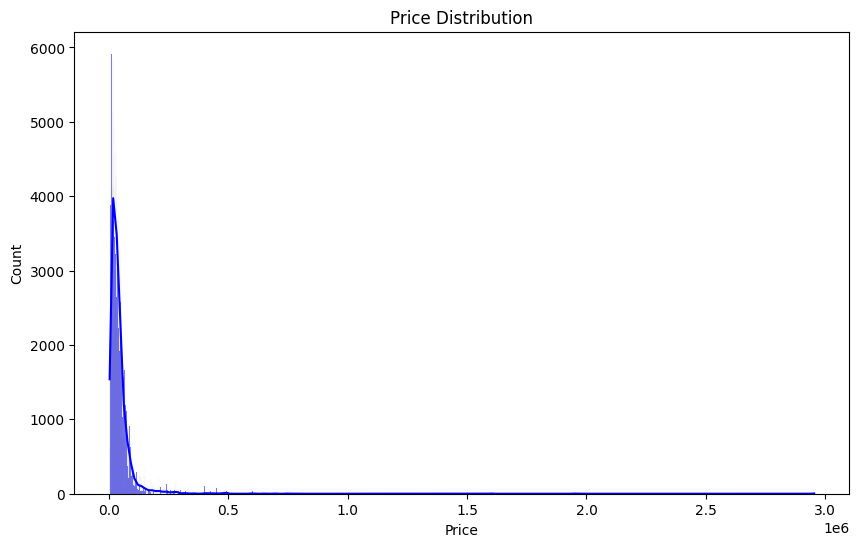

In [58]:
#let's check the distribution of price
plt.figure(figsize=(10,6))
sns.histplot(train_df['price'], kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')

## Applying log transformation to transform the price feature

In [59]:
# log-transform before training
train_df['price'] = np.log1p(train_df['price'])


Text(0.5, 0, 'Price')

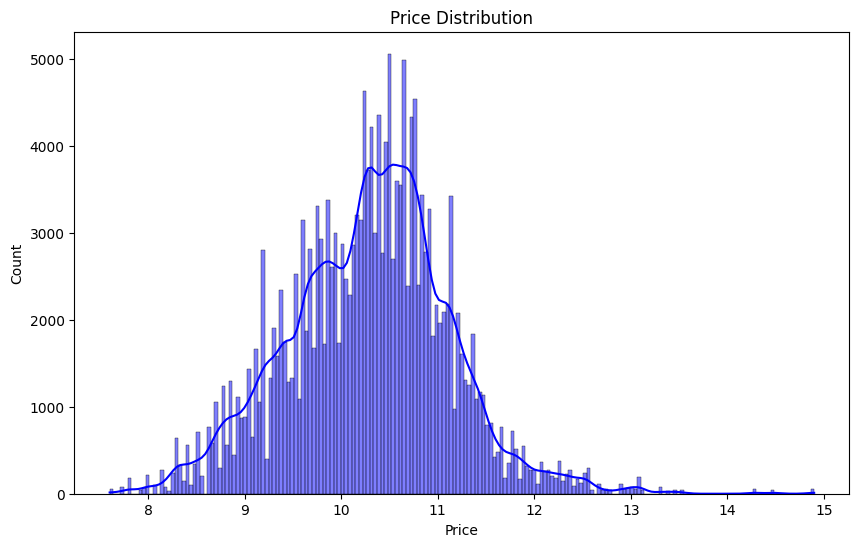

In [60]:
plt.figure(figsize=(10,6))
sns.histplot(train_df['price'],kde=True,color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')

## Setting the features variables and target variables

In [61]:
#let's set the features variables and target variables
X = train_df.drop('price',axis=1)
y =train_df['price']

## Model Training and Evaluation

In [62]:
#let's train the model
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.3,random_state=42)

In [63]:
(X_train.shape,y_train.shape),(X_valid.shape,y_valid.shape)

(((131973, 9), (131973,)), ((56560, 9), (56560,)))

In [64]:
from sklearn.preprocessing import StandardScaler



In [65]:
!pip install xgboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.9/295.9 MB 3.6 MB/s eta 0:00:00


In [66]:
!pip install openpyxl


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.9/250.9 kB 4.6 MB/s eta 0:00:00


In [67]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.3/47.3 kB 3.7 MB/s eta 0:00:00


## Model training with hyperparameter tuning using Pipeline

### Getting the RMSE Vvalues for each of the pipelines

In [68]:
import numpy as np
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import xgboost as xgb
from catboost import CatBoostRegressor   # <-- new import

# Define base pipelines
pipelines  = {
    'linear_regression': Pipeline([('scaler', StandardScaler()), ('regressor', LinearRegression())]),
    'lasso_regression': Pipeline([('scaler', StandardScaler()), ('regressor', Lasso(alpha=0.1))]),
    'gradient_boosting': Pipeline([('scaler', StandardScaler()), ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=9))]),
    'random_forest': Pipeline([('scaler', StandardScaler()), ('regressor', RandomForestRegressor(n_estimators=100, random_state=6, n_jobs=-1))]),
    'ada_boosting': Pipeline([('scaler', StandardScaler()), ('regressor', AdaBoostRegressor(n_estimators=100, random_state=9))]),
    'knn': Pipeline([('scaler', StandardScaler()), ('regressor', KNeighborsRegressor(n_neighbors=4, n_jobs=-1))]),
    'xgb': Pipeline([('scaler', StandardScaler()), ('regressor', xgb.XGBRegressor(random_state=9, n_jobs=-1))]),
    'catboost': Pipeline([('scaler', StandardScaler()),
                          ('regressor', CatBoostRegressor(
                              iterations=500,       # number of trees
                              depth=6,              # depth of trees
                              learning_rate=0.1,    # learning rate
                              loss_function='RMSE', # objective
                              verbose=0,            # silent training
                              random_seed=9,
                              thread_count=-1
                          ))]),
}




In [69]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_squared_error
import numpy as np

models_rmse = []
models = []

for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = np.expm1(pipeline.predict(X_valid))  # inverse transform
    mse = mean_squared_error(y_valid, y_pred)  # correct order
    rmse = np.sqrt(mse)
    models_rmse.append(rmse)
    models.append(pipeline)   # keep the whole pipeline
    print(f"Model {name} had an RMSE of {rmse}")


Model linear_regression had an RMSE of 43246.3533473008
Model lasso_regression had an RMSE of 38001.697078662
Model gradient_boosting had an RMSE of 43488.31428700397
Model random_forest had an RMSE of 45776.74948829803
Model ada_boosting had an RMSE of 57652.19883197441
Model knn had an RMSE of 47325.5244926215
Model xgb had an RMSE of 44666.642437952534
Model catboost had an RMSE of 44018.12612828578


## Choosing the best RMSE VALUE


In [70]:
best_model = models[np.argmin(models_rmse)] #np.argmin() returns the index of the minimum value in a list/array.
best_rmse = models_rmse[np.argmin(models_rmse)]
print(f"The best model is {best_model} with an RMSE of {best_rmse}")

The best model is Pipeline(steps=[('scaler', StandardScaler()), ('regressor', Lasso(alpha=0.1))]) with an RMSE of 38001.697078662


## Predicting the best_model to the testing data


In [71]:


 #Fit on the full training data


# Predict on test.csv
test_predictions = np.expm1(best_model.predict(test_df))  # inverse transform

# Create submission file
submission = pd.DataFrame({
    'id': test_df['id'],
    'price': test_predictions
})
submission.to_csv("submission_best_model.csv", index=False)

print("✅ Submission file created: submission_best_model.csv")


✅ Submission file created: submission_best_model.csv


In [72]:
submission.head()

,id,price
0,188533,20153.550978
1,188534,56033.852206
2,188535,46044.196173
3,188536,26450.298836
4,188537,28349.319612


In [73]:
from google.colab import files
files.download("submission_best_model.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Correlation Matrix


Text(0.5, 1.0, 'Correlation Heatmap')

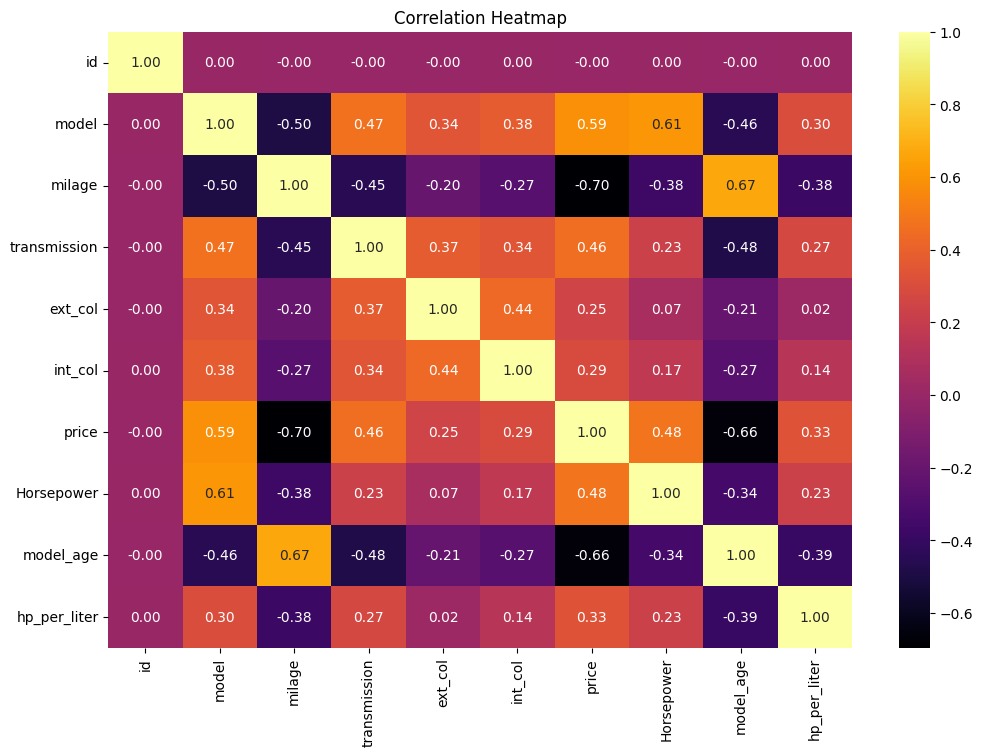

In [74]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(),annot=True,cmap='inferno',fmt='.2f')
plt.title('Correlation Heatmap')

        Feature  Importance  Abs_Importance
2        milage   -0.262446        0.262446
7     model_age   -0.202793        0.202793
1         model    0.139769        0.139769
6    Horsepower    0.056372        0.056372
0            id   -0.000000        0.000000
4       ext_col    0.000000        0.000000
3  transmission    0.000000        0.000000
5       int_col    0.000000        0.000000
8  hp_per_liter    0.000000        0.000000


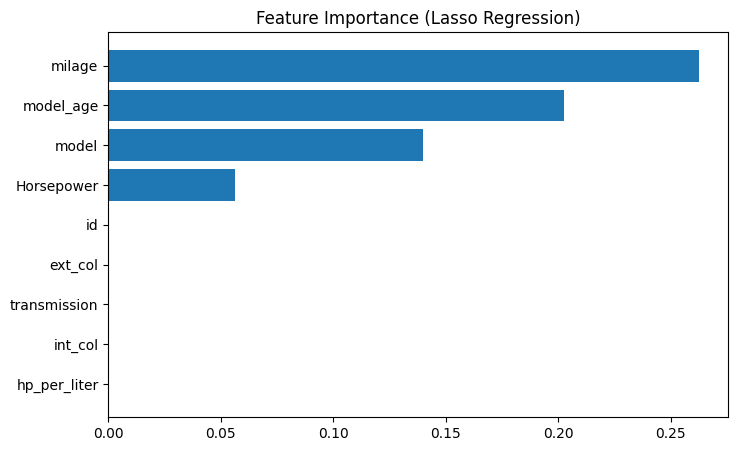

In [75]:
# Extract the trained Lasso regressor from your pipeline
lasso_model = pipelines['lasso_regression'].named_steps['regressor']

# Get feature names (from X_train)
feature_names = X_train.columns

# Get coefficients
coefficients = lasso_model.coef_

# Put into DataFrame
import pandas as pd
imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})
imp_df['Abs_Importance'] = imp_df['Importance'].abs()  # absolute importance
imp_df = imp_df.sort_values(by='Abs_Importance', ascending=False)

print(imp_df)

# Plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.barh(imp_df['Feature'], imp_df['Abs_Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance (Lasso Regression)")
plt.show()
